# Working with Observables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mcc import (
    Stock,
    KonstFloat,
    At,
    FixedAfter,
    RunningMax,
    DateIndex,
)
from mcc.pricing_models import simulate_equity_black_scholes_model

In [2]:
spot = 50
volatility = 0.2
dategrid = np.array(
    [
        np.datetime64("2021-01-01"),
        np.datetime64("2021-02-01"),
        np.datetime64("2021-03-01"),
        np.datetime64("2021-04-01"),
        np.datetime64("2021-05-01"),
        np.datetime64("2021-06-01"),
    ]
)
n = 100
rnd = np.random.RandomState(123)

(100, 6)

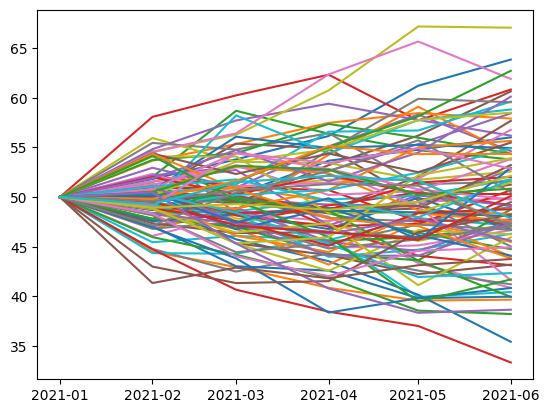

In [3]:
model = simulate_equity_black_scholes_model(
    "ABC", "USD", spot, dategrid, volatility, 0, n, rnd
)
plt.plot(model.dategrid, model.simulated_stocks["ABC"].T)
model.simulated_stocks["ABC"].shape

## Basic Observables

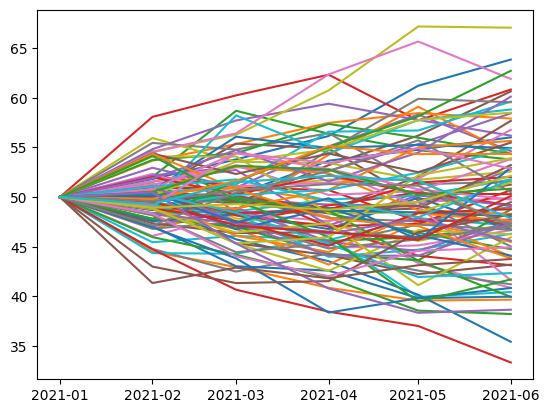

In [4]:
paths = Stock("ABC").simulate(model.eval_date_index, model)
plt.plot(model.dategrid, paths.T);

## Arithmetic

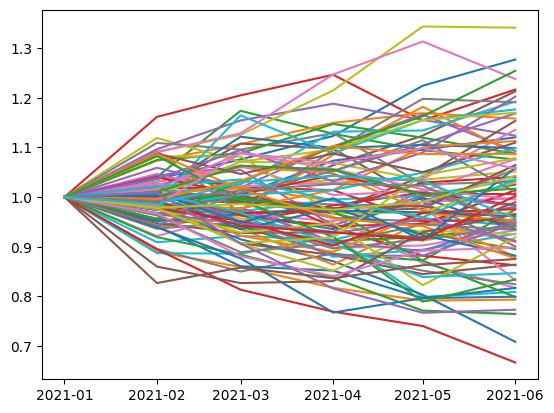

In [5]:
paths = (Stock("ABC") / spot).simulate(model.eval_date_index, model)
plt.plot(model.dategrid, paths.T);

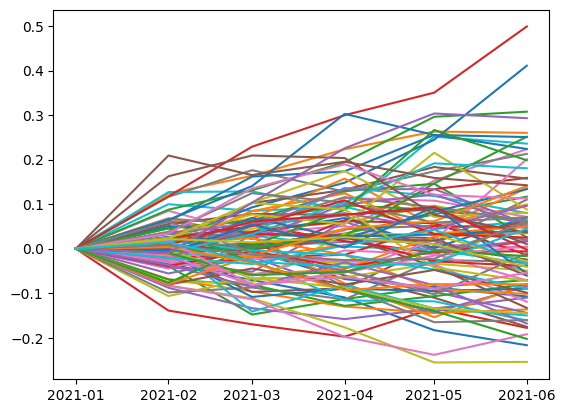

In [6]:
paths = (spot / Stock("ABC") - 1).simulate(model.eval_date_index, model)
plt.plot(model.dategrid, paths.T);

## Turn Floats into Booleans to form Conditions

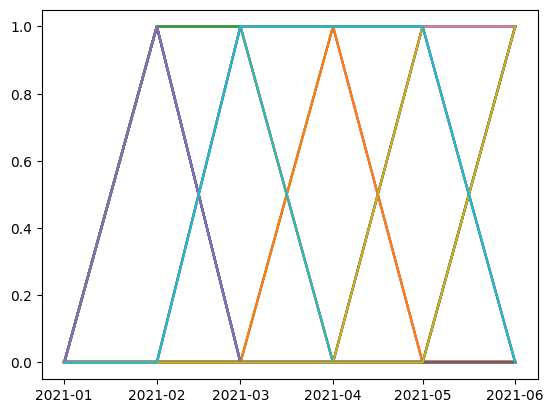

In [7]:
paths = (Stock("ABC") > spot).simulate(model.eval_date_index, model)
plt.plot(model.dategrid, paths.T);

## Fixings

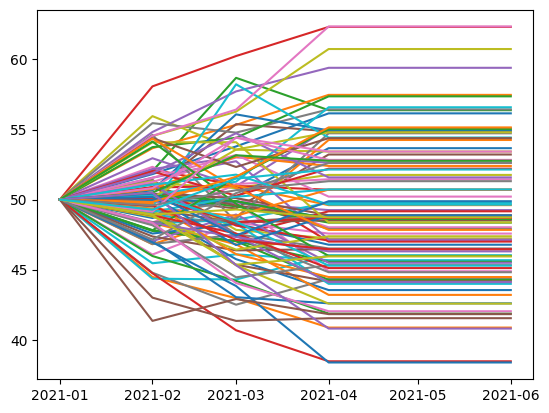

In [8]:
paths = FixedAfter(At(np.datetime64("2021-04-01")), Stock("ABC")).simulate(
    model.eval_date_index, model
)
plt.plot(model.dategrid, paths.T);

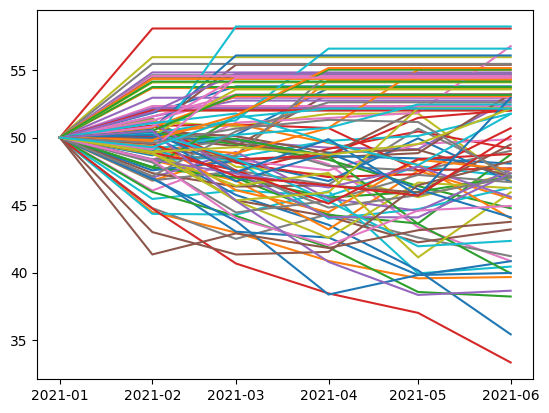

In [9]:
paths = FixedAfter(Stock("ABC") > 52, Stock("ABC")).simulate(
    model.eval_date_index, model
)
plt.plot(model.dategrid, paths.T);

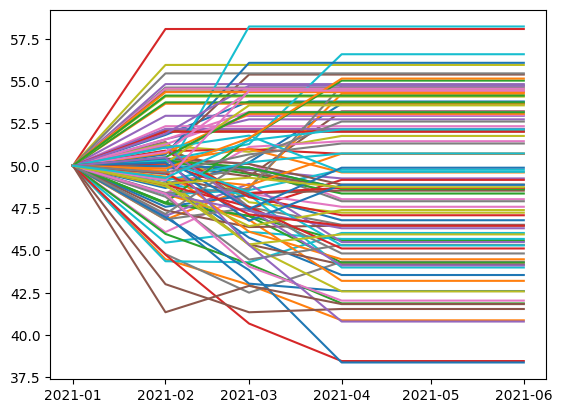

In [10]:
paths = FixedAfter(
    At(np.datetime64("2021-04-01")) | (Stock("ABC") > 52), Stock("ABC")
).simulate(model.eval_date_index, model)
plt.plot(model.dategrid, paths.T);

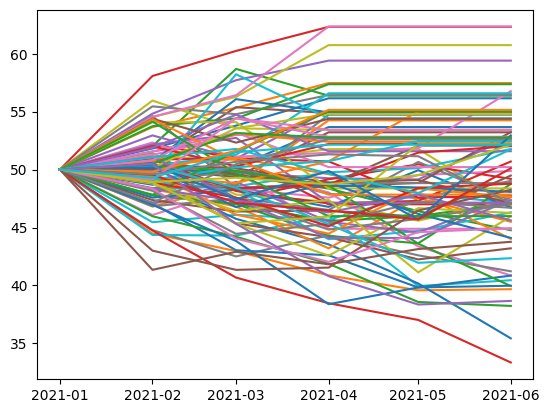

In [11]:
# fixing condition is checked *after* (including) first_observation_idx
paths = FixedAfter(Stock("ABC") > 52, Stock("ABC")).simulate(
    DateIndex(model.eval_date_index.index + 3), model
)
plt.plot(model.dategrid, paths.T);

# Running Maximum

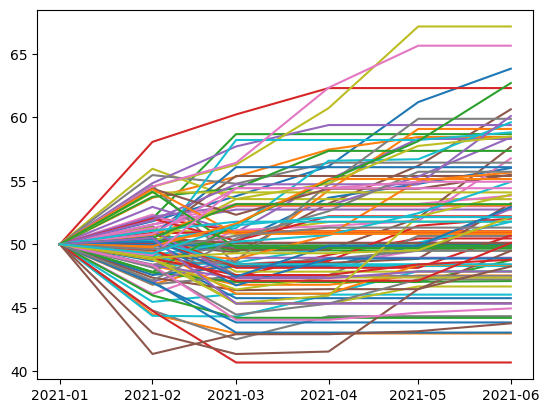

In [12]:
paths = RunningMax(Stock("ABC")).simulate(
    DateIndex(model.eval_date_index.index + 2), model
)
plt.plot(model.dategrid, paths.T);